#### Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Working Directory

In [2]:
os.getcwd()

'C:\\Users\\Chris\\Desktop\\Columbia\\Project_1\\CU-VIRT-AI-PT-03-2024-U-LOLC-PROJECT-1'

#### Reading Data set¶

In [3]:
path = 'C:\\Users\\Chris\\Desktop\\Columbia\\Project_1\\CU-VIRT-AI-PT-03-2024-U-LOLC-PROJECT-1\\Resources\\Unemployment.csv'
df = pd.read_csv(path)

#### EDA¶

In [4]:
df.head()

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0


#### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316633 entries, 0 to 316632
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   FIPS_Code  316633 non-null  int64  
 1   State      316633 non-null  object 
 2   Area_Name  316633 non-null  object 
 3   Attribute  316633 non-null  object 
 4   Value      316633 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.1+ MB


#### States Col

In [6]:
df['State'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

#### Extracting year

In [7]:
df['Date'] = df['Attribute'].str.extract('(\d+)')
df['Date'] = pd.to_datetime(df['Date'])

#### Modifying Attributes column

In [8]:
df['Attribute']= df['Attribute'].str.replace('_\d+', '',regex=True)

#### Re-Orginizing cols

In [9]:
df=df[['Date','State','Area_Name','Attribute','Value','FIPS_Code']]
df.head()

,Date,State,Area_Name,Attribute,Value,FIPS_Code
0,2000-01-01,US,United States,Civilian_labor_force,142601576.0,0
1,2000-01-01,US,United States,Employed,136904853.0,0
2,2000-01-01,US,United States,Unemployed,5696723.0,0
3,2000-01-01,US,United States,Unemployment_rate,4.0,0
4,2001-01-01,US,United States,Civilian_labor_force,143786537.0,0


#### Pivot Table

In [10]:
df_pivot = pd.pivot_table(df,values = 'Value',index=['Date','State','Area_Name'],columns=['Attribute'])
df_pivot.head()

Attribute                                            Civilian_labor_force  \
Date       State Area_Name                                                  
2000-01-01 AK    Alaska                                          319777.0   
                 Aleutians East Borough, AK                         942.0   
                 Aleutians West Census Area, AK                    2738.0   
                 Anchorage Borough/municipality, AK              140750.0   
                 Bethel Census Area, AK                            6406.0   

Attribute                                            Employed  \
Date       State Area_Name                                      
2000-01-01 AK    Alaska                              299590.0   
                 Aleutians East Borough, AK             860.0   
                 Aleutians West Census Area, AK        2597.0   
                 Anchorage Borough/municipality, AK  133661.0   
                 Bethel Census Area, AK                5833.0   

Attribute                                            Med_HH_Income_Percent_of_State_Total  \
Date       State Area_Name                                                                  
2000-01-01 AK    Alaska                                                               NaN   
                 Aleutians East Borough, AK                                           NaN   
                 Aleutians West Census Area, AK                                       NaN   
                 Anchorage Borough/municipality, AK                                   NaN   
                 Bethel Census Area, AK                                               NaN   

Attribute                                            Median_Household_Income  \
Date       State Area_Name                                                     
2000-01-01 AK    Alaska                                                  NaN   
                 Aleutians East Borough, AK                              NaN   
                 Aleutians West Census Area, AK                          NaN   
                 Anchorage Borough/municipality, AK                      NaN   
                 Bethel Census Area, AK                                  NaN   

Attribute                                            Metro  \
Date       State Area_Name                                   
2000-01-01 AK    Alaska                                NaN   
                 Aleutians East Borough, AK            NaN   
                 Aleutians West Census Area, AK        NaN   
                 Anchorage Borough/municipality, AK    NaN   
                 Bethel Census Area, AK                NaN   

Attribute                                            Rural_Urban_Continuum_Code  \
Date       State Area_Name                                                        
2000-01-01 AK    Alaska                                                     NaN   
                 Aleutians East Borough, AK                                 NaN   
                 Aleutians West Census Area, AK                             NaN   
                 Anchorage Borough/municipality, AK                         NaN   
                 Bethel Census Area, AK                                     NaN   

Attribute                                            Unemployed  \
Date       State Area_Name                                        
2000-01-01 AK    Alaska                                 20187.0   
                 Aleutians East Borough, AK                82.0   
                 Aleutians West Census Area, AK           141.0   
                 Anchorage Borough/municipality, AK      7089.0   
                 Bethel Census Area, AK                   573.0   

Attribute                                            Unemployment_rate  \
Date       State Area_Name                                               
2000-01-01 AK    Alaska                                            6.3   
                 Aleutians East Borough, AK                        8.7   
        

In [11]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75128 entries, (Timestamp('2000-01-01 00:00:00'), 'AK', 'Alaska') to (Timestamp('2022-01-01 00:00:00'), 'WY', 'Wyoming')
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian_labor_force                  75123 non-null  float64
 1   Employed                              75123 non-null  float64
 2   Med_HH_Income_Percent_of_State_Total  3192 non-null   float64
 3   Median_Household_Income               3193 non-null   float64
 4   Metro                                 3224 non-null   float64
 5   Rural_Urban_Continuum_Code            3219 non-null   float64
 6   Unemployed                            75123 non-null  float64
 7   Unemployment_rate                     75123 non-null  float64
 8   Urban_Influence_Code                  3219 non-null   float64
dtypes: float64(9)
memory usage: 5.5+ MB


In [12]:
df_pivot.drop(columns = ['Med_HH_Income_Percent_of_State_Total', 'Median_Household_Income','Metro', 'Rural_Urban_Continuum_Code','Urban_Influence_Code'],
              inplace=True)

#### Dropped NA cols

In [13]:
df_pivot.head()

Attribute                                            Civilian_labor_force  \
Date       State Area_Name                                                  
2000-01-01 AK    Alaska                                          319777.0   
                 Aleutians East Borough, AK                         942.0   
                 Aleutians West Census Area, AK                    2738.0   
                 Anchorage Borough/municipality, AK              140750.0   
                 Bethel Census Area, AK                            6406.0   

Attribute                                            Employed  Unemployed  \
Date       State Area_Name                                                  
2000-01-01 AK    Alaska                              299590.0     20187.0   
                 Aleutians East Borough, AK             860.0        82.0   
                 Aleutians West Census Area, AK        2597.0       141.0   
                 Anchorage Borough/municipality, AK  133661.0      7089.0   
                 Bethel Census Area, AK                5833.0       573.0   

Attribute                                            Unemployment_rate  
Date       State Area_Name                                              
2000-01-01 AK    Alaska                                            6.3  
                 Aleutians East Borough, AK                        8.7  
                 Aleutians West Census Area, AK                    5.1  
                 Anchorage Borough/municipality, AK                5.0  
                 Bethel Census Area, AK                            8.9

In [14]:
df_pivot.tail()

Attribute                             Civilian_labor_force  Employed  \
Date       State Area_Name                                             
2022-01-01 WY    Teton County, WY                  16647.0   16193.0   
                 Uinta County, WY                   8863.0    8524.0   
                 Washakie County, WY                3858.0    3704.0   
                 Weston County, WY                  3792.0    3691.0   
                 Wyoming                          291756.0  281343.0   

Attribute                             Unemployed  Unemployment_rate  
Date       State Area_Name                                           
2022-01-01 WY    Teton County, WY          454.0                2.7  
                 Uinta County, WY          339.0                3.8  
                 Washakie County, WY       154.0                4.0  
                 Weston County, WY         101.0                2.7  
                 Wyoming                 10413.0                3.6

#### Year subset

In [15]:
df_date = df_pivot['2018-01-01':'2022-01-01'][:][:]
df_date.head()

Attribute                                            Civilian_labor_force  \
Date       State Area_Name                                                  
2018-01-01 AK    Alaska                                          355499.0   
                 Aleutians East Borough, AK                        2316.0   
                 Aleutians West Census Area, AK                    3639.0   
                 Anchorage Borough/municipality, AK              150748.0   
                 Bethel Census Area, AK                            7136.0   

Attribute                                            Employed  Unemployed  \
Date       State Area_Name                                                  
2018-01-01 AK    Alaska                              334068.0     21431.0   
                 Aleutians East Borough, AK            2250.0        66.0   
                 Aleutians West Census Area, AK        3521.0       118.0   
                 Anchorage Borough/municipality, AK  143152.0      7596.0   
                 Bethel Census Area, AK                6287.0       849.0   

Attribute                                            Unemployment_rate  
Date       State Area_Name                                              
2018-01-01 AK    Alaska                                            6.0  
                 Aleutians East Borough, AK                        2.8  
                 Aleutians West Census Area, AK                    3.2  
                 Anchorage Borough/municipality, AK                5.0  
                 Bethel Census Area, AK                           11.9

#### NY State

In [48]:
df_NY = df_date.loc(axis=0)[:,['NY']]
df_NY

Attribute                                Civilian_labor_force  Employed  \
Date       State Area_Name                                                
2018-01-01 NY    Albany County, NY                   161009.0  155092.0   
                 Allegany County, NY                  19908.0   18802.0   
                 Bronx County, NY                    626880.0  591303.0   
                 Broome County, NY                    85989.0   81836.0   
                 Cattaraugus County, NY               34788.0   32949.0   
...                                                       ...       ...   
2022-01-01 NY    Washington County, NY                27552.0   26662.0   
                 Wayne County, NY                     43492.0   42101.0   
                 Westchester County, NY              496415.0  480910.0   
                 Wyoming County, NY                   17510.0   16899.0   
                 Yates County, NY                     11671.0   11328.0   

Attribute                                Unemployed  Unemployment_rate  
Date       State Area_Name                                              
2018-01-01 NY    Albany County, NY           5917.0                3.7  
                 Allegany County, NY         1106.0                5.6  
                 Bronx County, NY           35577.0                5.7  
                 Broome County, NY           4153.0                4.8  
                 Cattaraugus County, NY      1839.0                5.3  
...                                             ...                ...  
2022-01-01 NY    Washington County, NY        890.0                3.2  
                 Wayne County, NY            1391.0                3.2  
                 Westchester County, NY     15505.0                3.1  
                 Wyoming County, NY           611.0                3.5  
                 Yates County, NY             343.0                2.9  

[315 rows x 4 columns]

#### Bronx NY

In [49]:
df_Bronx = df_NY.loc(axis=0)[:,['NY'],['Bronx County, NY']]
df_Bronx

,,Attribute,Civilian_labor_force,Employed,Unemployed,Unemployment_rate
Date,State,Area_Name,,,,
2018-01-01,NY,"Bronx County, NY",626880.0,591303.0,35577.0,5.7
2019-01-01,NY,"Bronx County, NY",625009.0,591519.0,33490.0,5.4
2020-01-01,NY,"Bronx County, NY",613416.0,515459.0,97957.0,16.0
2021-01-01,NY,"Bronx County, NY",614171.0,529675.0,84496.0,13.8
2022-01-01,NY,"Bronx County, NY",603694.0,556635.0,47059.0,7.8


# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [92]:
path_1 = 'C:\\Users\\Chris\\Desktop\\Columbia\\Project_1\\CU-VIRT-AI-PT-03-2024-U-LOLC-PROJECT-1\\Resources\\MHINY36005A052NCEN.csv'

In [93]:
med_df = pd.read_csv(path_1)
med_df.head()

,DATE,MHINY36005A052NCEN
0,1989-01-01,19881
1,1990-01-01,.
2,1991-01-01,.
3,1992-01-01,.
4,1993-01-01,21454


#### Renaming Column

In [94]:
med_df.rename(columns={'DATE':'Date'},inplace=True)

#### Casting as datetime

In [95]:
med_df['Date'] = pd.to_datetime(med_df['Date'])

#### 2018-2022

In [96]:
med_df.set_index('Date',inplace=True)

In [97]:
med_df.head()

,MHINY36005A052NCEN
Date,
1989-01-01,19881
1990-01-01,.
1991-01-01,.
1992-01-01,.
1993-01-01,21454


In [98]:
med_income_subset = med_df['2018-01-01':'2022-01-01']
med_income_subset

,MHINY36005A052NCEN
Date,
2018-01-01,38566
2019-01-01,41470
2020-01-01,44906
2021-01-01,43143
2022-01-01,45864


#### Merging Data Frames

In [99]:
df_Bronx = df_Bronx.join(med_income_subset,on='Date',how='left')

In [100]:
df_Bronx.head()

,State,Area_Name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Income,MHINY36005A052NCEN
Date,,,,,,,,
2018-01-01,NY,"Bronx County, NY",626880.0,591303.0,35577.0,5.7,38566,38566
2019-01-01,NY,"Bronx County, NY",625009.0,591519.0,33490.0,5.4,41470,41470
2020-01-01,NY,"Bronx County, NY",613416.0,515459.0,97957.0,16.0,44906,44906
2021-01-01,NY,"Bronx County, NY",614171.0,529675.0,84496.0,13.8,43143,43143
2022-01-01,NY,"Bronx County, NY",603694.0,556635.0,47059.0,7.8,45864,45864


#### Renaming Column

In [101]:
df_Bronx.rename(columns={'MHINY36005A052NCEN':'Med_house_hold_income'},inplace=True)

#### Resetting Index

In [102]:
df_Bronx.reset_index(inplace=True)

#### Setting 'Date' as Index

In [103]:
df_Bronx.set_index('Date',inplace=True)

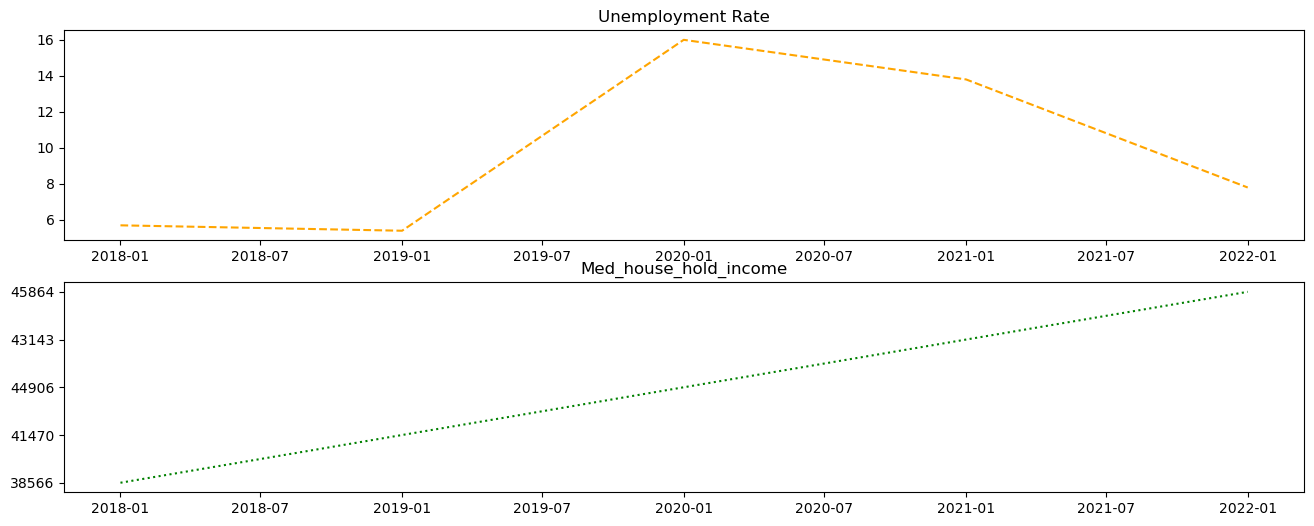

In [105]:
fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (16,6))

ax[0].plot(df_Bronx.index, df_Bronx['Unemployment_rate'],color = 'Orange', linestyle ='--')
ax[0].set_title('Unemployment Rate')

ax[1].plot(df_Bronx.index, df_Bronx['Med_house_hold_income'],color ='green',linestyle=':')
ax[1].set_title('Med_house_hold_income')

plt.show()